# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENT-1: PREPROCESSING TECHNIQUES FOR NEURAL NETWORKS

## Name: Sai Kiran Mohanty 
## Reg. No.: 2341013236
## Section: 2c3

# 1. Data Exploration and Visualization
* Load the dataset and analyze its structure.
* Generate summary statistics and check for missing values.
* Visualize feature distributions (histograms, boxplots) to identify outliers.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,  KBinsDiscretizer , OneHotEncoder , LabelEncoder
from scipy.stats import zscore

In [5]:
data = pd.read_csv("winequality-red.csv", delimiter=';')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.shape

(1599, 12)

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
col = data.columns
n_col = len(col)

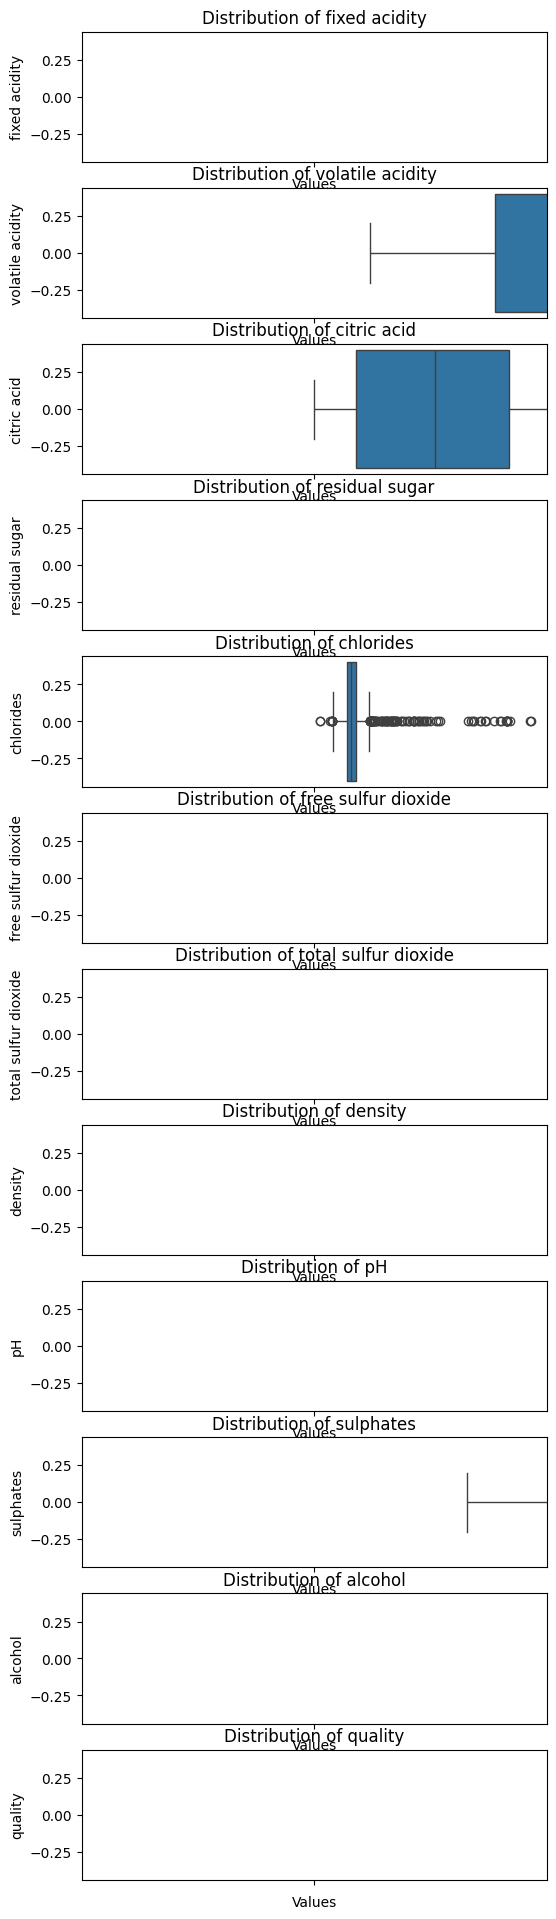

In [10]:
fig, axes = plt.subplots(nrows=n_col, ncols=1, figsize=(6,2*n_col))
for i in range(n_col):
    sns.boxplot(data.iloc[:,i],ax=axes[i],vert=False)
    axes[i].set_title(f'Distribution of {data.columns[i]}')
    axes[i].set_xlabel('Values')



<Axes: ylabel='Count'>

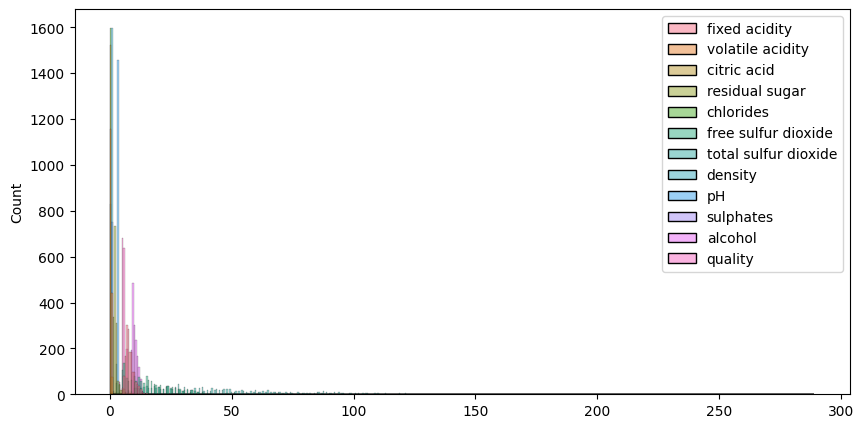

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data.iloc[:,:])

# 2. Data Cleaning
*	Handle Missing Values (if present; else, explain potential methods).
*	Outlier Treatment: Use IQR or Z-score to detect and handle outliers (e.g., capping).


### There are two ways handle missing data :
* Remove method: Remove the row which have missing values.
* Imputation methed: Impute the values randomly, maximum/minimum/mean of value of the column , knn imputer can be used for multivariate imputation  

In [14]:
z_score = {}

for column in data.select_dtypes(include=[np.number]).columns:
    z_score[column] = zscore(data[column])

for column in z_score:
    data[f'Z_{column}'] = z_score[column]

In [15]:
z_data = data.iloc[:,n_col:]
z_data

,Z_fixed acidity,Z_volatile acidity,Z_citric acid,Z_residual sugar,Z_chlorides,Z_free sulfur dioxide,Z_total sulfur dioxide,Z_density,Z_pH,Z_sulphates,Z_alcohol,Z_quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [16]:
z_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Z_fixed acidity         1599 non-null   float64
 1   Z_volatile acidity      1599 non-null   float64
 2   Z_citric acid           1599 non-null   float64
 3   Z_residual sugar        1599 non-null   float64
 4   Z_chlorides             1599 non-null   float64
 5   Z_free sulfur dioxide   1599 non-null   float64
 6   Z_total sulfur dioxide  1599 non-null   float64
 7   Z_density               1599 non-null   float64
 8   Z_pH                    1599 non-null   float64
 9   Z_sulphates             1599 non-null   float64
 10  Z_alcohol               1599 non-null   float64
 11  Z_quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [17]:
z_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Z_fixed acidity,1599.0,3.554936e-16,1.000313,-2.137045,-0.700719,-0.241094,0.505795,4.355149
Z_volatile acidity,1599.0,1.733031e-16,1.000313,-2.278280,-0.769931,-0.043689,0.626688,5.877976
Z_citric acid,1599.0,-8.887339e-17,1.000313,-1.391472,-0.929318,-0.056360,0.765247,3.743574
Z_residual sugar,1599.0,-1.244227e-16,1.000313,-1.162696,-0.453218,-0.240375,0.043416,9.195681
Z_chlorides,1599.0,3.732682e-16,1.000313,-1.603945,-0.371229,-0.179946,0.053845,11.127035
Z_free sulfur dioxide,1599.0,-6.221137e-17,1.000313,-1.422500,-0.848716,-0.179300,0.490115,5.367284
Z_total sulfur dioxide,1599.0,4.443669e-17,1.000313,-1.230584,-0.744040,-0.257497,0.472318,7.375154
Z_density,1599.0,-3.473172e-14,1.000313,-3.538731,-0.607756,0.001760,0.576825,3.680055
Z_pH,1599.0,2.861723e-15,1.000313,-3.700401,-0.655141,-0.007213,0.575922,4.528282
Z_sulphates,1599.0,6.754377e-16,1.000313,-1.936507,-0.638220,-0.225128,0.424016,7.918677


<Axes: >

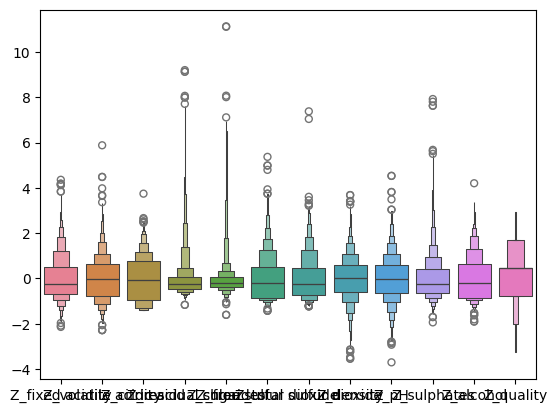

In [18]:
sns.boxenplot(z_data)

<Axes: ylabel='Count'>

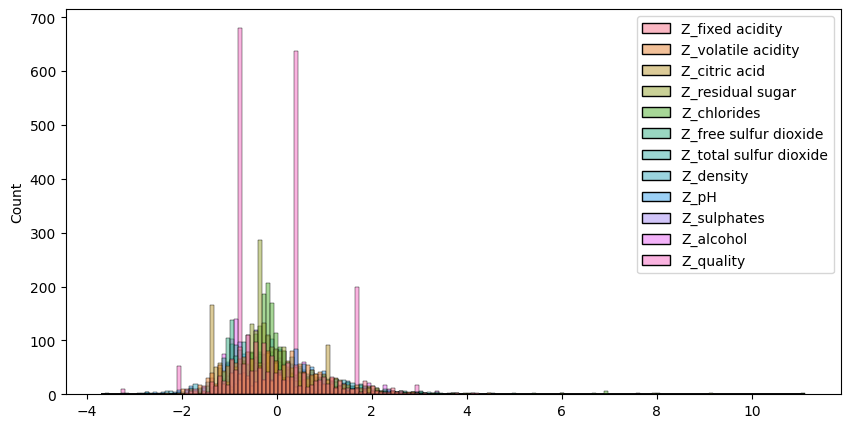

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(z_data.iloc[:,:])

# 3. Feature Engineering
*	Create a Categorical Feature: Bin a numerical column (e.g., alcohol into low, medium, high).
*	Encode Categorical Features: Apply one-hot encoding and label encoding.




In [21]:
z_data['Z_alcohol'].describe()

count    1.599000e+03
mean     1.066481e-16
std      1.000313e+00
min     -1.898919e+00
25%     -8.663789e-01
50%     -2.093081e-01
75%      6.354971e-01
max      4.202453e+00
Name: Z_alcohol, dtype: float64

In [22]:
kbins = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
z_data['Z_alcohol'] = kbins.fit_transform(z_data[['Z_alcohol']])
bin_labels = {0:'low',1:'medium',2:'high'}
z_data['Z_alcohol'] = z_data['Z_alcohol'].map(bin_labels)

In [23]:
# ohe = OneHotEncoder(sparse_output=False)
# en_data = ohe.fit_transform(z_data[['Z_alcohol']])
# en_df = pd.DataFrame(en_data,columns=ohe.categories_[0])
# z_data = pd.concat([z_data,en_df], axis = 1).drop('Z_alcohol',axis=1)
le = LabelEncoder()
z_data['Z_alcohol'] = le.fit_transform(z_data['Z_alcohol'])

# 4. Feature Scaling
*	Normalization: Scale features to [0, 1] using MinMaxScaler.
*	Standardization: Use StandardScaler to transform data to mean=0, variance=1.



In [92]:
scaler = MinMaxScaler()
z_data.iloc[:, [0,2]] = scaler.fit_transform(z_data.iloc[:, [0,2]])

In [94]:
z_data.describe()

,Z_fixed acidity,Z_volatile acidity,Z_citric acid,Z_residual sugar,Z_chlorides,Z_free sulfur dioxide,Z_total sulfur dioxide,Z_density,Z_pH,Z_sulphates,Z_alcohol,Z_quality
count,1599.000000,1599.000000,1599.000000,1.599000e+03,1599.000000,1599.000000,1.599000e+03,1599.000000,1.599000e+03,1.599000e+03,1599.000000,1.599000e+03
mean,0.329171,0.279329,0.270976,-8.887339e-18,0.000000,0.000000,8.887339e-18,0.000000,-1.777468e-17,8.887339e-18,0.657598,-8.887339e-18
std,0.154079,0.122644,0.194801,1.000313e+00,1.000313,1.000313,1.000313e+00,1.000313,1.000313e+00,1.000313e+00,0.266842,1.000313e+00
min,0.000000,0.000000,0.000000,-1.162696e+00,-1.603945,-1.422500,-1.230584e+00,-3.538731,-3.700401e+00,-1.936507e+00,0.000000,-3.265165e+00
25%,0.221239,0.184932,0.090000,-4.532184e-01,-0.371229,-0.848716,-7.440403e-01,-0.607756,-6.551405e-01,-6.382196e-01,0.500000,-7.878226e-01
50%,0.292035,0.273973,0.260000,-2.403750e-01,-0.179946,-0.179300,-2.574968e-01,0.001760,-7.212705e-03,-2.251281e-01,0.500000,4.508484e-01
75%,0.407080,0.356164,0.420000,4.341614e-02,0.053845,0.490115,4.723184e-01,0.576825,5.759223e-01,4.240158e-01,1.000000,4.508484e-01
max,1.000000,1.000000,1.000000,9.195681e+00,11.127035,5.367284,7.375154e+00,3.680055,4.528282e+00,7.918677e+00,1.000000,2.928190e+00


In [96]:
std_scaler = StandardScaler()
z_data_scaled = std_scaler.fit_transform(z_data)
z_data_scaled = pd.DataFrame(z_data_scaled,columns=z_data.columns)
z_data_scaled.describe()

,Z_fixed acidity,Z_volatile acidity,Z_citric acid,Z_residual sugar,Z_chlorides,Z_free sulfur dioxide,Z_total sulfur dioxide,Z_density,Z_pH,Z_sulphates,Z_alcohol,Z_quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1599.000000,1.599000e+03,1599.000000,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.377189e-16,1.110917e-16,-3.021695e-16,-8.887339e-18,0.000000,0.000000,8.887339e-18,0.000000,-1.777468e-17,8.887339e-18,7.109871e-17,-8.887339e-18
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313,1.000313,1.000313e+00,1.000313,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945,-1.422500,-1.230584e+00,-3.538731,-3.700401e+00,-1.936507e+00,-2.465143e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-0.371229,-0.848716,-7.440403e-01,-0.607756,-6.551405e-01,-6.382196e-01,-5.907904e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-0.179946,-0.179300,-2.574968e-01,0.001760,-7.212705e-03,-2.251281e-01,-5.907904e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,0.053845,0.490115,4.723184e-01,0.576825,5.759223e-01,4.240158e-01,1.283563e+00,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,11.127035,5.367284,7.375154e+00,3.680055,4.528282e+00,7.918677e+00,1.283563e+00,2.928190e+00


# 5. Feature Selection
*	Principal Component Analysis (PCA): Apply PCA to reduce the number of features.



# 6. Train Test Splitting
*	Split the dataset so that 80% of the samples will be used for training and rest will be used for testing.